### Data Acquisition

In [1]:
# Import of all needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import of all needed data
assets = pd.read_csv('../data/raw/Assets_2020Q4.csv')
cf_liabs = pd.read_csv('../data/raw/Liabilities_2020Q4.csv')

### *** 1.- Asset Cash Flow projection ***

In [3]:
assets.head()

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,VC_ACTUAL,NOM,TYPEB,SECTOR,RATING,...,TIPO_PRODUCTO,TIR_MDO,DUR,TirContable,Frecuencia,PRECIO,EMISOR,PAIS,TIPO_CUPON,SENIORITY
0,u101,ES0282102005,"UNIVERSIDAD DE VALENCIA 6,6% 15/12/2022",6.6,12/15/2022,"3,069,792.72","3,005,060.52",B,CAC,BB+,...,40,-0.29,1.895,5.41,1.0,113.83,Universidad de Valencia,ES,Fixed excl,SENIOR SECURED
1,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.0,1/4/2022,"2,880,903.65","3,000,000.00",B,A99,AAA,...,42,-0.74,1.008,4.09,0.0,100.75,Federal Republic of Germany,DE,Zero bonds,SENIOR UNSECURED
2,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.0,11/1/2024,"319,205.01","400,000.00",B,A99,BBB-,...,42,-0.21,3.836,6.06,0.0,100.83,Italian Republic,IT,Zero bonds,SENIOR UNSECURED
3,u101,FR0000570996,FRANCE O.A.T. STRIP 0% 25/04/2021,0.0,4/25/2021,"5,035,102.13","5,100,000.00",B,A99,AA,...,42,-0.47,0.315,4.11,0.0,100.15,French Republic,FR,Zero bonds,SENIOR UNSECURED
4,u101,IT0004848435,ITALY BTPS HYBRID,0.0,11/1/2023,"477,212.70","565,000.00",B,A99,BBB-,...,42,-0.30,2.833,6.14,0.0,100.86,Italian Republic,IT,Zero bonds,SENIOR UNSECURED


In [4]:
assets_mod = assets[['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM']]

In [5]:
assets_mod.head(15)

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM
0,u101,ES0282102005,"UNIVERSIDAD DE VALENCIA 6,6% 15/12/2022",6.60,12/15/2022,"3,005,060.52"
1,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.00,1/4/2022,"3,000,000.00"
2,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.00,11/1/2024,"400,000.00"
3,u101,FR0000570996,FRANCE O.A.T. STRIP 0% 25/04/2021,0.00,4/25/2021,"5,100,000.00"
4,u101,IT0004848435,ITALY BTPS HYBRID,0.00,11/1/2023,"565,000.00"
5,u102,ES0213469580,"EUROPEAN INVESTMENT BANK 8,5% 17/06/2021",8.50,6/17/2021,"2,103,542.37"
6,u102,XS0105656267,BAYER HYPO- VEREINSBANK 5% 21/12/2029,5.00,12/21/2029,"15,200,000.00"
7,u102,XS0105174352,BAYER HYPO- VEREINSBANK 9% 13/12/2024,9.00,12/13/2024,"12,000,000.00"
8,u102,XS0095166897,"STATOILHYDRO ASA 7,15% 26/03/2029",7.15,3/26/2029,"20,000,000.00"
9,u102,XS0195051114,"NWBK 5,15% 06/24",5.15,6/29/2024,"60,000,000.00"


In [6]:
## Lets adapt the time column in order to anualize the annual CF
assets_mod['MATURITY'] = pd.DatetimeIndex(assets_mod['FEC_VTO']).year
assets_mod['YRS_TO_MAT'] = pd.DatetimeIndex(assets_mod['FEC_VTO']).year - 2020

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
total_assets = assets_mod.shape[0]
total_assets

1298

In [8]:
assets_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 8 columns):
PLAN          1298 non-null object
ISIN          1268 non-null object
VALOR         1298 non-null object
CUPON         1298 non-null float64
FEC_VTO       1298 non-null object
NOM           1298 non-null object
MATURITY      1298 non-null int64
YRS_TO_MAT    1298 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 81.2+ KB


In [9]:
assets_mod["NOM"] = assets_mod["NOM"].str.replace(',','')

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
#assets_mod.loc[:,"NOM"] = assets_mod["NOM"].str.replace(',','')

In [11]:
assets_mod["NOM"] = pd.to_numeric(assets_mod["NOM"], downcast='float', errors='ignore')

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
assets_mod["YRS_TO_MAT"] = pd.to_numeric(assets_mod["YRS_TO_MAT"], downcast='integer', errors='ignore')

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
cf_projection = pd.DataFrame(columns=['PLAN','ISIN','VALOR','COUPON','PRINCIPAL','YEAR'])
cf_projection

,PLAN,ISIN,VALOR,COUPON,PRINCIPAL,YEAR


In [14]:
### Lets perform the bonds projection:

for x in range(total_assets):

    maturity = int(assets_mod.iloc[x]["YRS_TO_MAT"])

    aux_df = pd.DataFrame({'PLAN':assets_mod.iloc[x]["PLAN"],
                      'ISIN':assets_mod.iloc[x]["ISIN"],
                      'VALOR':assets_mod.iloc[x]["VALOR"],
                      'COUPON':[assets_mod.iloc[x]["NOM"] * 0.01 * assets_mod.iloc[x]["CUPON"] for i in range(maturity)],
                      'PRINCIPAL': 0,
                      'YEAR': [2021+i for i in range(maturity)]})
    
    aux_df["PRINCIPAL"][maturity-1] = assets_mod.iloc[x]["NOM"]
    
    cf_projection = cf_projection.append(aux_df)

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
cf_projection.head(30)

,PLAN,ISIN,VALOR,COUPON,PRINCIPAL,YEAR
0,u101,ES0282102005,"UNIVERSIDAD DE VALENCIA 6,6% 15/12/2022",1.983340e+05,0,2021
1,u101,ES0282102005,"UNIVERSIDAD DE VALENCIA 6,6% 15/12/2022",1.983340e+05,3005060,2022
0,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.000000e+00,0,2021
1,u101,DE0001142552,BUNDESREPUB. DEUTSCHLAND 0% 04/01/2022,0.000000e+00,3000000,2022
0,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.000000e+00,0,2021
1,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.000000e+00,0,2022
2,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.000000e+00,0,2023
3,u101,IT0001247342,BUONI POLIENNALI STRIP 0% 01/11/2024,0.000000e+00,400000,2024
0,u101,FR0000570996,FRANCE O.A.T. STRIP 0% 25/04/2021,0.000000e+00,5100000,2021
0,u101,IT0004848435,ITALY BTPS HYBRID,0.000000e+00,0,2021


In [16]:
cf_projection["CF_ASSET"] = cf_projection["COUPON"] + cf_projection["PRINCIPAL"]

In [17]:
cf_assets= cf_projection.groupby(["PLAN","YEAR"], as_index=False).agg({"COUPON":"sum","PRINCIPAL":"sum","CF_ASSET":"sum"})
cf_assets.head()

,PLAN,YEAR,COUPON,PRINCIPAL,CF_ASSET
0,u101,2021,1.983340e+05,5100000,5.298334e+06
1,u101,2022,1.983340e+05,6005060,6.203394e+06
2,u101,2023,0.000000e+00,565000,5.650000e+05
3,u101,2024,0.000000e+00,400000,4.000000e+05
4,u102,2021,2.243757e+07,15908542,3.834611e+07


In [18]:
cf_assets["PLAN"].unique()

array(['u101', 'u102', 'u103', 'u104', 'u105', 'u106', 'u107', 'u108',
       'u109', 'u110', 'u114', 'u119', 'u120', 'u121', 'u125', 'u130',
       'u201', 'u202', 'u206', 'u207', 'u208', 'u210', 'u215', 'u218',
       'u220', 'u221', 'u222', 'u223', 'u225', 'u228', 'u229', 'u230',
       'u231', 'u232', 'u301', 'u302', 'u303', 'u304', 'u305', 'u308',
       'u310', 'u311', 'u401'], dtype=object)

In [19]:
cf125 =cf_assets[cf_assets["PLAN"] == "u125"]
cf125.head()

,PLAN,YEAR,COUPON,PRINCIPAL,CF_ASSET
313,u125,2021,19623989.3,58404000,78027989.3
314,u125,2022,17631174.4,90832000,108463174.4
315,u125,2023,14663740.5,95215000,109878740.5
316,u125,2024,12044078.5,97791000,109835078.5
317,u125,2025,9258446.5,73764000,83022446.5


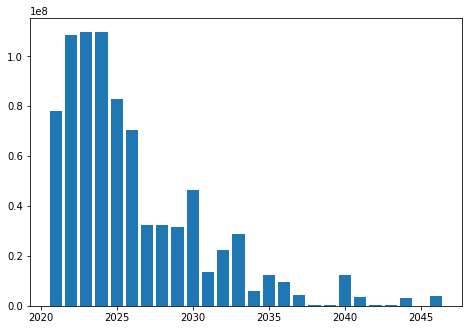

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cf125["YEAR"],cf125["CF_ASSET"])
plt.show()

### *** 2.- Liaibilities Cash Flow preparation ***

In [21]:
cf_liabs.rename(columns={"group":"PLAN","t_to": "YEAR","l_cflow_rp": "CF_LIAB"}, inplace = True)

In [22]:
cf_liabs.head()

,PLAN,YEAR,CF_LIAB
0,u101,0,0.000000
1,u101,1,-2489.386711
2,u101,2,-1079.130255
3,u101,3,-418.506211
4,u101,4,-154.599644


In [23]:
cf_liabs['CF_LIAB'] =cf_liabs['CF_LIAB'] * - 1000

In [24]:
cf_liabs.head()

,PLAN,YEAR,CF_LIAB
0,u101,0,-0.000000e+00
1,u101,1,2.489387e+06
2,u101,2,1.079130e+06
3,u101,3,4.185062e+05
4,u101,4,1.545996e+05


In [25]:
# Modification in YEAR in order to equalize the info
cf_liabs["YEAR"] = cf_liabs["YEAR"] + 2020

In [26]:
cf_liabs = cf_liabs[cf_liabs["YEAR"]!=2020]

In [27]:
liab125 = cf_liabs[cf_liabs ["PLAN"] =="u125"]
liab125.head()

,PLAN,YEAR,CF_LIAB
733,u125,2021,1.279490e+08
734,u125,2022,1.044864e+08
735,u125,2023,8.495336e+07
736,u125,2024,6.972026e+07
737,u125,2025,5.709590e+07


### *** 3.- Asset and Liability combination ***

(2021.0, 2050.0)

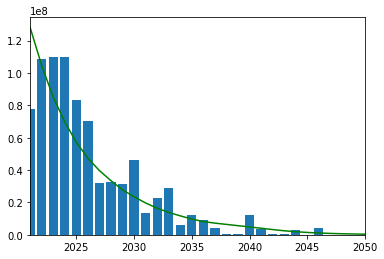

In [28]:
plt.bar(cf125["YEAR"],cf125["CF_ASSET"])
plt.plot(liab125["YEAR"],liab125["CF_LIAB"],'g')
plt.xlim(2021,2050)

In [29]:
cf_combined = cf_assets.merge(cf_liabs, left_on=["PLAN","YEAR"], right_on=["PLAN","YEAR"])

In [30]:
cf_combined.head()

,PLAN,YEAR,COUPON,PRINCIPAL,CF_ASSET,CF_LIAB
0,u101,2021,1.983340e+05,5100000,5.298334e+06,2.489387e+06
1,u101,2022,1.983340e+05,6005060,6.203394e+06,1.079130e+06
2,u101,2023,0.000000e+00,565000,5.650000e+05,4.185062e+05
3,u101,2024,0.000000e+00,400000,4.000000e+05,1.545996e+05
4,u102,2021,2.243757e+07,15908542,3.834611e+07,7.809456e+07


In [31]:
portfolios = cf_combined["PLAN"].unique()
portfolios

array(['u101', 'u102', 'u103', 'u104', 'u105', 'u106', 'u107', 'u108',
       'u109', 'u110', 'u120', 'u121', 'u125', 'u130', 'u201', 'u202',
       'u206', 'u207', 'u210', 'u215', 'u218', 'u220', 'u221', 'u229',
       'u230', 'u231', 'u301', 'u302', 'u303', 'u304', 'u305', 'u310',
       'u311'], dtype=object)

In [32]:
cf_complete = pd.DataFrame(columns=['PLAN','YEAR','CF_ASSET','CF_LIAB','CF_CUM_ASSET','CF_CUM_LIAB'])
cf_complete

,PLAN,YEAR,CF_ASSET,CF_LIAB,CF_CUM_ASSET,CF_CUM_LIAB


In [33]:
for portfolio in portfolios:
    aux_df = cf_combined[cf_combined["PLAN"] == portfolio]
    
    aux_df['CF_CUM_ASSET'] = aux_df['CF_ASSET'].cumsum()
    aux_df['CF_CUM_LIAB'] = aux_df['CF_LIAB'].cumsum()
    
    cf_complete = cf_complete.append(aux_df, sort=False)

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [34]:
cf_complete['GAP'] = cf_complete['CF_ASSET'] - cf_complete['CF_LIAB']
cf_complete['CF_CUM'] = cf_complete['CF_CUM_ASSET'] - cf_complete['CF_CUM_LIAB']

In [35]:
portfolios

array(['u101', 'u102', 'u103', 'u104', 'u105', 'u106', 'u107', 'u108',
       'u109', 'u110', 'u120', 'u121', 'u125', 'u130', 'u201', 'u202',
       'u206', 'u207', 'u210', 'u215', 'u218', 'u220', 'u221', 'u229',
       'u230', 'u231', 'u301', 'u302', 'u303', 'u304', 'u305', 'u310',
       'u311'], dtype=object)

In [36]:
u101 = cf_complete[cf_complete["PLAN"]=="u101"]
u102 = cf_complete[cf_complete["PLAN"]=="u102"]
u103 = cf_complete[cf_complete["PLAN"]=="u103"]
u104 = cf_complete[cf_complete["PLAN"]=="u104"]
u105 = cf_complete[cf_complete["PLAN"]=="u105"]
u106 = cf_complete[cf_complete["PLAN"]=="u106"]
u107 = cf_complete[cf_complete["PLAN"]=="u107"]
u108 = cf_complete[cf_complete["PLAN"]=="u108"]
u109 = cf_complete[cf_complete["PLAN"]=="u109"]
u110 = cf_complete[cf_complete["PLAN"]=="u110"]
u120 = cf_complete[cf_complete["PLAN"]=="u120"]
u121 = cf_complete[cf_complete["PLAN"]=="u121"]
u125 = cf_complete[cf_complete["PLAN"]=="u125"]
u130 = cf_complete[cf_complete["PLAN"]=="u130"]
u201 = cf_complete[cf_complete["PLAN"]=="u201"]
u202 = cf_complete[cf_complete["PLAN"]=="u202"]
u206 = cf_complete[cf_complete["PLAN"]=="u206"]
u207 = cf_complete[cf_complete["PLAN"]=="u207"]
u210 = cf_complete[cf_complete["PLAN"]=="u210"]
u215 = cf_complete[cf_complete["PLAN"]=="u215"]
u218 = cf_complete[cf_complete["PLAN"]=="u218"]
u220 = cf_complete[cf_complete["PLAN"]=="u220"]
u221 = cf_complete[cf_complete["PLAN"]=="u221"]
u229 = cf_complete[cf_complete["PLAN"]=="u229"]
u230 = cf_complete[cf_complete["PLAN"]=="u230"]
u231 = cf_complete[cf_complete["PLAN"]=="u231"]
u301 = cf_complete[cf_complete["PLAN"]=="u301"]
u302 = cf_complete[cf_complete["PLAN"]=="u302"]
u303 = cf_complete[cf_complete["PLAN"]=="u303"]
u304 = cf_complete[cf_complete["PLAN"]=="u304"]
u305 = cf_complete[cf_complete["PLAN"]=="u305"]
u310 = cf_complete[cf_complete["PLAN"]=="u310"]
u311 = cf_complete[cf_complete["PLAN"]=="u311"]

(2021.0, 2050.0)

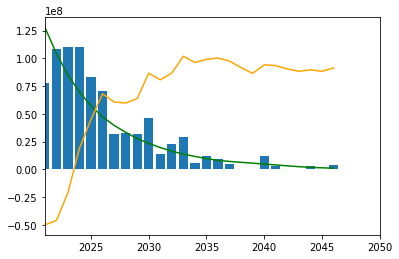

In [37]:
plt.bar(u125["YEAR"],u125["CF_ASSET"])
plt.plot(u125["YEAR"],u125["CF_LIAB"],'g')
plt.plot(u125["YEAR"],u125["CF_CUM"],color ='orange')
plt.xlim(2021,2050)

(2021.0, 2050.0)

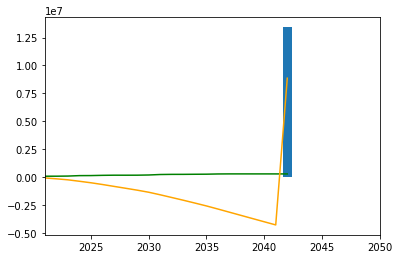

In [39]:
plt.bar(u218["YEAR"],u218["CF_ASSET"])
plt.plot(u218["YEAR"],u218["CF_LIAB"],'g')
plt.plot(u218["YEAR"],u218["CF_CUM"],color ='orange')
plt.xlim(2021,2050)

In [40]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [41]:
elegible_years = u210.nlargest(3, ['GAP'])["YEAR"].tolist()
elegible_years

[2041, 2048, 2042]

In [42]:
elegible_years = u125.nlargest(3, ['GAP'])["YEAR"].tolist()
elegible_years

[2024, 2025, 2023]

In [43]:
gap_years = u125.nsmallest(5, ['GAP'])["YEAR"].tolist()
gap_years

[2021, 2027, 2031, 2038, 2034]

In [44]:
u125.nsmallest(5, ['GAP'])["YEAR"].index.tolist()

[271, 277, 281, 288, 284]

In [45]:
u125[u125["YEAR"].isin(gap_years)]

,PLAN,YEAR,CF_ASSET,CF_LIAB,CF_CUM_ASSET,CF_CUM_LIAB,COUPON,PRINCIPAL,GAP,CF_CUM
271,u125,2021,78027989.3,1.279490e+08,78027989.3,1.279490e+08,19623989.3,58404000.0,-4.992104e+07,-4.992104e+07
277,u125,2027,32273922.8,3.963812e+07,591868265.3,5.311774e+08,5967922.8,26306000.0,-7.364198e+06,6.069084e+07
281,u125,2031,13657605.0,1.964791e+07,716141715.3,6.355145e+08,2857605.0,10800000.0,-5.990308e+06,8.062726e+07
284,u125,2034,6076382.5,1.170054e+07,773668165.3,6.774603e+08,1226382.5,4850000.0,-5.624162e+06,9.620790e+07
288,u125,2038,509242.5,6.421001e+06,800559585.3,7.089662e+08,509242.5,0.0,-5.911758e+06,9.159335e+07


In [46]:
trial = assets_mod[plan & maturity]["NOM"]

NameError: name 'plan' is not defined

In [47]:
target_asset = find_nearest(trial, goal)

NameError: name 'trial' is not defined

In [48]:
assets_sell = pd.DataFrame(columns=['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM','YRS_TO_MAT','MATURITY'])
assets_sell

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM,YRS_TO_MAT,MATURITY


In [49]:
for year in elegible_years:
    goal = int(u125[u125["YEAR"] == year ]["GAP"])
    plan = assets_mod["PLAN"]=="u125"
    maturity = assets_mod["MATURITY"]== year
    alternatives = assets_mod[plan & maturity]["NOM"]
    target_asset = find_nearest(alternatives, goal)
    aux_df = assets_mod[plan & maturity][assets_mod[plan & maturity]["NOM"] == target_asset]
    
    assets_sell = assets_sell.append(aux_df)

/home/miguel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [50]:
available_cash = assets_sell["NOM"].sum()
available_cash

82800000.0

In [51]:
assets_sell

,CUPON,FEC_VTO,ISIN,MATURITY,NOM,PLAN,VALOR,YRS_TO_MAT
631,3.80,4/30/2024,ES00000124W3,2024,39000000.0,u125,"SPGB 3,8% 30/04/2024",4
597,4.65,7/30/2025,ES00000122E5,2025,26900000.0,u125,"ESTADO4,65 0725",5
612,3.99,1/23/2023,XS0874864860,2023,16900000.0,u125,TEF 3.987% 23/01/2023,3


In [52]:

u125[u125["YEAR"].isin(gap_years)].index.tolist()

[271, 277, 281, 284, 288]

In [53]:
assets_purchase = pd.DataFrame(columns=['PLAN','ISIN','VALOR','CUPON','FEC_VTO','NOM','MATURITY','YRS_TO_MAT'])
assets_purchase

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM,MATURITY,YRS_TO_MAT


In [54]:
for year in gap_years:
    if available_cash >= abs(int(u125[u125["YEAR"] == year]["GAP"])):

        aux_df = pd.DataFrame({'PLAN':u125.iloc[0]["PLAN"],
                        'ISIN': ["GEN_CORP_BOND_" + str(year)],
                        'VALOR': ["Generic corporate bond with maturity " + str(year)],
                        'CUPON':5,
                        'FEC_VTO':year,
                        'NOM':abs(int(u125[u125["YEAR"] == year]["GAP"])),
                        'MATURITY':year,
                        'YRS_TO_MAT': year - 2021})
        
        available_cash = available_cash - aux_df.iloc[0]['NOM']
        
        assets_purchase = assets_purchase.append(aux_df)
        assets_purchase = assets_purchase.reset_index(drop = True)
    else:
        assets_purchase.iloc[0]['NOM'] += available_cash

In [55]:
assets_purchase

,PLAN,ISIN,VALOR,CUPON,FEC_VTO,NOM,MATURITY,YRS_TO_MAT
0,u125,GEN_CORP_BOND_2021,Generic corporate bond with maturity 2021,5,2021,49921042,2021,0
1,u125,GEN_CORP_BOND_2027,Generic corporate bond with maturity 2027,5,2027,7364198,2027,6
2,u125,GEN_CORP_BOND_2031,Generic corporate bond with maturity 2031,5,2031,5990307,2031,10
3,u125,GEN_CORP_BOND_2038,Generic corporate bond with maturity 2038,5,2038,5911758,2038,17
4,u125,GEN_CORP_BOND_2034,Generic corporate bond with maturity 2034,5,2034,5624162,2034,13


In [ ]:
                        'ISIN': "CASH",
                        'VALOR':"REMAIN CASH ALLOCATION"_